In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [33]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
len(X_train)

60000

In [35]:
len(X_test)

10000

In [36]:
X_train[0].shape

(28, 28)

In [37]:
X_train = X_train / 255
X_test = X_test / 255

In [38]:
X_train
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

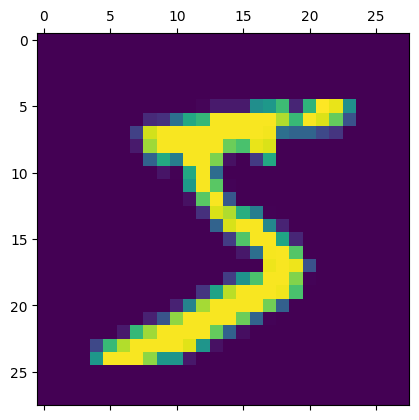

In [39]:
plt.matshow(X_train[0])

In [40]:
y_train[2]

4

In [41]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
X_train_flatten = X_train.reshape(len(X_train), 784)
X_train_flatten.shape

(60000, 784)

In [43]:
X_test_flatten = X_test.reshape(len(X_test), 784)
X_test_flatten.shape

(10000, 784)

In [44]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
])

model.compile(
    optimizer = "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 725us/step - loss: 0.4687 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 1s 728us/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.2839 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.2662 - accuracy: 0.9262


In [45]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 673us/step - loss: 0.2678 - accuracy: 0.9273


[0.26781684160232544, 0.927299976348877]

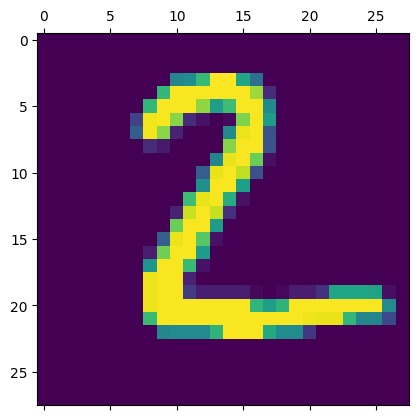

In [46]:
plt.matshow(X_test[1])

In [47]:
y_predicted = model.predict(X_test_flatten)
y_predicted[1]

313/313 [==============================] - 0s 651us/step


array([4.4138181e-01, 4.3323189e-03, 9.9971217e-01, 4.0581563e-01,
       7.0991762e-10, 7.9151207e-01, 9.4121766e-01, 1.8895753e-12,
       1.7220446e-01, 2.3470252e-09], dtype=float32)

In [48]:
np.argmax(y_predicted[1])

2

In [49]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [  10,    8,  929,   14,    9,    1,   13,   10,   34,    4],
       [   4,    0,   21,  927,    0,   17,    2,   10,   20,    9],
       [   1,    1,    4,    2,  927,    0,   10,    4,    7,   26],
       [  12,    3,    3,   41,   12,  752,   23,    9,   31,    6],
       [  11,    3,    6,    1,    7,    7,  920,    2,    1,    0],
       [   1,    6,   23,    7,    9,    0,    0,  951,    2,   29],
       [  10,    9,    6,   18,    9,   18,   11,   13,  873,    7],
       [  11,    7,    1,   11,   34,    4,    0,   22,    4,  915]])>

In [52]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(
    optimizer = "adam", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1209 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0826 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0505 - accuracy: 0.9848


In [53]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 824us/step - loss: 0.0820 - accuracy: 0.9739


[0.08203431963920593, 0.9739000201225281]

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape = (784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1) 

model.compile(
    optimizer = "SGD", 
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(X_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6753 - accuracy: 0.8298
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3466 - accuracy: 0.9024
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2976 - accuracy: 0.9156
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.9305


In [58]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [59]:
tf.test.is_built_with_cuda()

False